In [1]:
import pandas as pd

df = pd.read_csv('yelp_business.csv')
hour = pd.read_csv('yelp_business_hours.csv')


In [19]:
df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


From yelp_business csv file, we have following columns:

- **business_id**: unique string business id for each business
- **name**: name of business
- **neighborhood**	
- **address**: full address of the business
- **city**
- **state**
- **postal_code**: postal code of the city
- **latitude**	
- **longitude**
- **stars**: star rating, rounded to half-stars
- **review_count**: number of reviews
- **is_open**: 0 or 1 for closed or open, respectively
- **categories**: an array of strings of business categories
    

In [20]:
hour.head()

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


This is extra info about open hours for business. Hours are using a 24hr clock.

In [21]:
len(df)

174567

In [22]:
len(hour)

174567

We just checked if two dataframe has the same length, the answer is YES! Now we can combine two dataframe into one so that we can have the business open hour comes with the business info. Meanwhile, the colun 'neighborhood' is not that meaningful, so we drop it.

In [23]:
business = df.merge(hour, on = 'business_id', how = 'right')
business.drop(df.columns[[2]], axis = 1, inplace = True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


Here we go! Look at what we have now. 

We can use 'name' as the title, so when user search a location name, they will see the business name. 

And we can provide 'address' and maybe later we will try to show up these business at map with provided latitude and longitude. 

The 'stars' will help our user to valuate the business they want to visit. 

The 'review_count' also helps our user to decided whether the stars for a business reliable or not. 

We will try to avoid the business with 'is_open' == 0 which the business is closed. 

In our plan, we would like our user to choose which date they for their plan, we can use calender or some package to figure out which weekday it is and check the corresponding open hour and provide this information to our user.

Let's start with small dataset to test if everything works out. We would use state of 'AZ'.

In [24]:
az = business[business['state'] == "AZ"]
az.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
11,Y0eMNa5C-YU1RQOZf9XvVA,"""CubeSmart Self Storage""","""2414 South Gilbert Road""",Chandler,AZ,85286,33.271720,-111.791257,5.0,23,1,Local Services;Self Storage,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,8:30-17:30,11:0-15:0
16,IQSlT5jGE6CCDhSG0zG3xg,"""T & Y Nail Spa""","""8411 W Thunderbird Rd, Unit 101""",Peoria,AZ,85381,33.608654,-112.240012,3.0,20,1,Beauty & Spas;Nail Salons,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-18:0,10:0-17:0


In [25]:
len(az)

52214

In [26]:
business_cats=';'.join(az['categories'].dropna())
cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

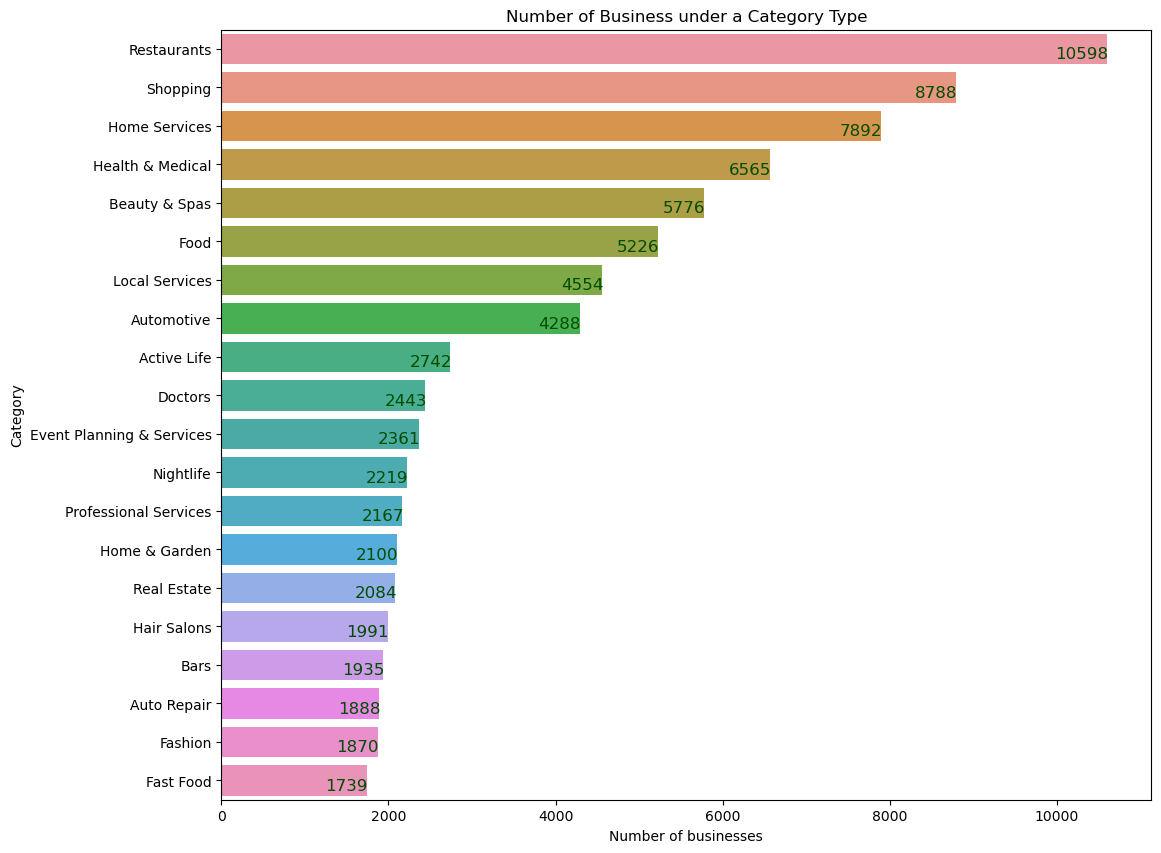

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
ax.set_ylabel('Category')
ax.set_xlabel('Number of businesses')
ax.set_title('Number of Business under a Category Type')

for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()    

In [32]:
category = 'Bars'
contain_values = az[az['categories'].str.contains(category)].reset_index()
display(contain_values)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,191,M3uV9Y3EDSpy9d4YwyNSAQ,"""Yakiramen""","""10605 N 43rd Ave""",Phoenix,AZ,85029,33.582363,-112.149884,4.0,66,1,Nightlife;Japanese;Music Venues;Ramen;Arts & E...,None,16:0-23:0,16:0-23:0,16:0-23:0,16:0-0:0,16:0-0:0,16:0-23:0
1,216,DVaTciFGcCXLHTufHZM4_A,"""Big Bang - Dueling Piano Bar""","""501 S Mill Ave, Ste B-101""",Tempe,AZ,85281,33.425266,-111.939774,4.0,161,0,Music Venues;Lounges;Dive Bars;Bars;Nightlife;...,None,None,20:0-2:0,20:0-2:0,19:0-2:0,19:0-2:0,None
2,253,6PwKC0dqP9uI85FEP86iPQ,"""Red Viet Cuisine - Sushi""","""5221 S Power Rd, Ste 104""",MESA,AZ,85212,33.321069,-111.685172,3.5,164,0,Sushi Bars;Restaurants;Japanese;Asian Fusion;V...,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0
3,382,pBoWsom3mZFYo9EucIWRDg,"""Kabuki Sushi & Grill""","""8378 W Thunderbird Rd, Ste 107""",Peoria,AZ,85381,33.611422,-112.239520,4.0,157,1,Restaurants;Japanese;Sushi Bars,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
4,408,tCJGEQVqjELLYv3fPNX5Rw,"""Fleming's Prime Steakhouse-Scottsdale""","""20753 N Pima Rd""",Scottsdale,AZ,85255,33.674238,-111.889288,3.5,190,1,Nightlife;Restaurants;Steakhouses;Wine Bars;Ba...,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:30,17:0-22:30,16:0-21:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,174205,6yUKYC9z0o6NEgylo8_RPg,"""Sodalicious""","""2333 S Val Vista Dr""",Gilbert,AZ,85295,33.307783,-111.755202,3.5,40,1,Specialty Food;Juice Bars & Smoothies;Food,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,7:30-23:0,8:30-23:0,None
2581,174222,0kD9yJIB2cmvOh8-WbcO_w,"""Poki Bar Central""","""2836 E Indian School Rd, Ste A-1""",Phoenix,AZ,85016,33.495436,-112.019786,3.5,66,1,Japanese;Poke;Restaurants;Hawaiian;Food;Sushi ...,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:30
2582,174262,ecJri9ozyke4dOCWulZiRQ,"""Nishikawa Ramen""","""1909 E Ray Rd""",Chandler,AZ,85225,33.320006,-111.809662,4.0,279,1,Japanese;Tapas Bars;Asian Fusion;Ramen;Restaur...,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
2583,174292,gcGSfX4Yb-LEC8ckEpYVPg,"""Draft House Eatery & Lounge""","""15814 N 83rd Ave""",Peoria,AZ,85382,33.628251,-112.238064,3.0,54,0,Bars;Restaurants;American (Traditional);Nightlife,16:0-2:0,16:0-2:0,16:0-2:0,16:0-2:0,16:0-2:0,11:0-2:0,9:30-2:0


### Next Step Forward

#### We now have necessary information about the event categories based on location, so we can now construct functions for our webapp to return necessary dataframes with input given from the user!

In [33]:
def load_df():
    # returns dataframe for all businesses available in the US
    df = pd.read_csv('yelp_business.csv')
    hour = pd.read_csv('yelp_business_hours.csv')
    info = df.merge(hour,on = 'business_id', how = 'right').drop(['neighborhood'],axis=1)
    closed_index = info.index[info['is_open']==0]
    info = info.drop(closed_index,axis=0).reset_index(drop=True)
    closed_index2 = set(info.index[info['monday']=='None'])
    for day in ['tuesday','wednesday','thursday','friday','saturday','sunday']:
        indeces = set(info.index[info['monday']=='None'])
        closed_index2 = closed_index2 & indeces
    return info.drop(closed_index2).reset_index(drop=True)

def user_df(df, state=None, city=None, zip_code=None, day=None, category=None):
    '''
    inputs: 
        df, 
        state: two-letter acronym string,
        city: string,
        zip_code: integer,
        day: string
        category: string
    returns:
        dataframe filtered by desired user input
    '''
    if state:
        df = df[df['state']==state]
    if city:
        df = df[df['city']==city]
    if zip_code:
        df = df[df['postal_code']==zip_code]
    if day:
        df = df[df[day]!='None']
    if category:
        df = df[df['categories'].str.contains(category)]
    return df.reset_index(drop=True)

def get_categories(df):
    '''
    input:
        filtered df with desired businesses
    returns:
        category df with their counts in descending order
    '''
    categories_str=';'.join(df['categories'].dropna())
    categories_series = pd.DataFrame(categories_str.split(';'),columns=['category']).value_counts()
    categories_df = categories_series.reset_index()
    categories_df.columns = ['category','count']
    return categories_df

Now, notice for each business, there are a number of reviews along with average rating. How can we make a proper recommendation to the user? A place with hundred reviews with an average rating of 5 should appear before another place with 1 review of 5 stars. We can implement this with weights to each metric.

In [36]:
import numpy as np
def recommended_df(df):
    '''
    input:
        filtered df with desired businesses
    returns:
        sorted df based on 
            rating = weight_stars * stars + log(review_count)
    '''
    df_temp = df.copy()
    weight_stars = 0.7
    rating_col = weight_stars*df['stars']+np.log(df['review_count']+1)
    df_temp.insert(loc=0 ,column='rating', value=rating_col)
    df_temp = df_temp.sort_values(by=['rating'], ascending = False).reset_index(drop = True)
    return df_temp

In [37]:
businesses = load_df()
businesses = user_df(businesses, state='AZ', day = 'sunday', category='Buffet')
recommendation = recommended_df(businesses)
display(recommendation)

,rating,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,9.586150,tV5PcOIFlB12dpcbCy78VA,"""India Oven""","""1315 S Gilbert Rd""",Mesa,AZ,85204,33.391609,-111.787729,4.5,623,1,Indian;Buffets;Restaurants,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0
1,9.234499,JQYkVnUzS5vgFxZgCuW7ag,"""Thai E-San""","""616 W Indian School Rd""",Phoenix,AZ,85013,33.495155,-112.082213,4.5,438,1,Buffets;Thai;Restaurants;Beer;Wine & Spirits;Food,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,12:0-21:30,12:0-21:30
2,9.022118,S4qUsi44l5D9BbUCkhwQEA,"""New India Gate""","""4939 W Ray Rd, Ste 1""",Chandler,AZ,85226,33.319230,-111.925813,4.5,354,1,Buffets;Bars;Nightlife;Vegan;Beer Bar;Indian;H...,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-21:0
3,8.939960,tnG4_L5bZiffTbaFru9EBg,"""Princess Mediterranean Market & Deli""","""2620 W Broadway Rd""",Mesa,AZ,85202,33.407997,-111.887898,4.5,326,1,Home Services;Buffets;Food;Restaurants;Lebanes...,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,10:0-20:0,10:0-19:0
4,8.879933,-8QlV3b_9H4BAh6LgMIr1g,"""Nandini Indian Cuisine""","""1845 E Broadway Rd, Ste 101""",Tempe,AZ,85282,33.406601,-111.907520,4.0,436,1,Indian;Buffets;Vegan;Restaurants,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,11:0-14:30,11:0-14:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,4.179442,prrnJEMpCh1cSxrQJBYy7g,"""Hibachi City Buffet""","""3414 W Southern Ave, Ste 168""",Phoenix,AZ,85041,33.392205,-112.131667,3.0,7,1,Sushi Bars;Buffets;Restaurants;Chinese,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,11:0-22:30,11:0-22:30,11:0-21:30
102,3.994439,4qpHOC34mwzE5aJnGm1_BA,"""Peter Piper Pizza""","""1463 N Dysart Rd""",Avondale,AZ,85323,33.453203,-112.340317,1.5,18,1,Restaurants;Pizza;Chicken Wings;Buffets,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,10:0-23:0,11:0-22:0
103,3.597225,tSJaZL5X81j2k-GqtpBM_w,"""Peter Piper Pizza""","""4105 N 51st Ave, Ste 111""",Phoenix,AZ,85031,33.495977,-112.167255,2.0,8,1,Chicken Wings;Buffets;Pizza;Restaurants,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,10:0-23:0,11:0-22:0
104,3.136294,89Tgq6_T1m8CQ-8l_VPcDQ,"""Pitchforks Restaurant""","""301 E Orange Mall""",Tempe,AZ,85281,33.418315,-111.933799,2.5,3,1,Buffets;Restaurants,7:0-21:0,7:0-21:0,7:0-21:0,7:0-21:0,7:0-19:0,8:0-19:0,8:0-20:0


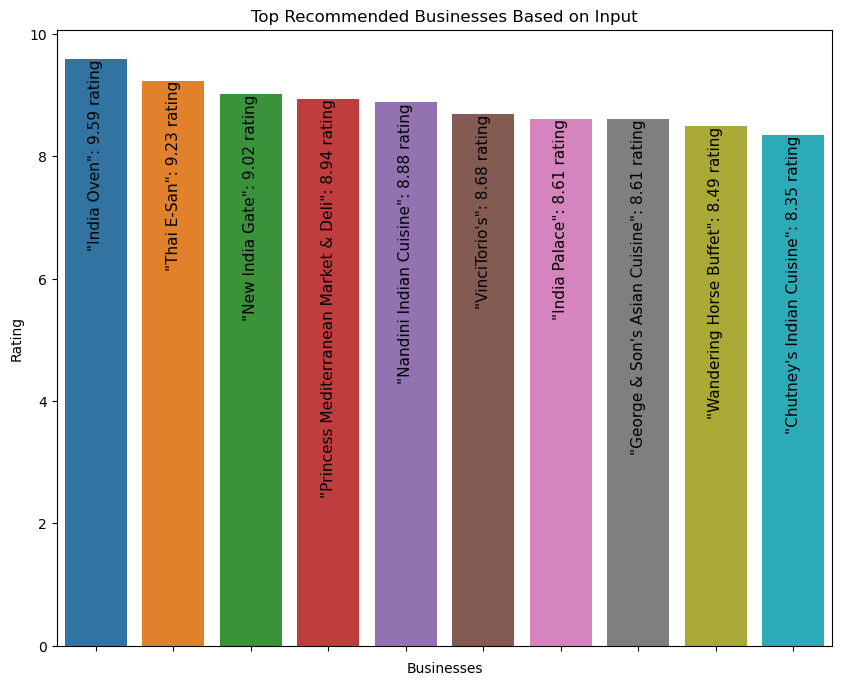

In [38]:
top_recommendations = recommendation.iloc[:10]

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=top_recommendations, x='name', y='rating')

for i, row in top_recommendations.iterrows():
    ax.text(i, row['rating'], row['name']+ ': ' + str(round(row['rating'],2)) + ' rating', 
            color='black', ha="center", va="top", 
            fontsize=11, rotation = 90)
ax.set_title('Top Recommended Businesses Based on Input')
ax.set_xlabel('Businesses')
ax.set_xticklabels([])
ax.set_ylabel('Rating')
plt.show()

Let's check another place:

In [28]:
ca = business[business['state'] == "CA"]
ca.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
14601,s44fonP-M6Gzh7goJi559w,"""Natural Bridge Canyon""","""Badwater Rd""",Las Vegas,CA,NaN,36.275800,-116.777000,3.5,3,1,Active Life,None,None,None,None,None,None,None
22535,UntbR8C0Mxsfd-hNBZXO-w,"""La Chamade""","""Via San Nullo 48""",Montreal,CA,80078,40.891417,14.092636,4.5,4,1,Pizza;Restaurants,11:30-0:30,11:30-0:30,11:30-0:30,11:30-0:30,11:30-0:30,11:30-0:30,11:30-0:30
26909,Xp2Owe_MZcRiCFZJuyarVg,"""Casa Bonita Green Cleaning""","""366 Dimaggio Ave""",Pittsburgh,CA,94565,38.018949,-121.894084,4.5,8,1,Home Cleaning;Home Organization;Office Cleanin...,8:30-16:0,8:30-16:0,8:30-16:0,8:30-16:0,8:30-16:0,None,None
109117,8d8QHAktYg8Q2C3ZpAhwvQ,"""Viva Las Vegas Rockabilly Weekend""","""3403 Cerritos Ave""",Las Vegas,CA,90720,33.810437,-118.072707,4.0,14,1,Arts & Entertainment;Musicians;Festivals;Local...,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,None,None
152924,jYnEPopX6gLlkoIRnWX7VQ,"""Open Up Therapies""","""ReNew Medical Spa, 6980 Smoke Ranch Rd, Ste150""",Las Vegas,CA,89128,36.198854,-115.265978,5.0,3,0,Massage;Health & Medical;Life Coach;Yoga;Activ...,None,None,None,None,None,None,None


In [29]:
len(ca)

5

In [30]:
business_cats=';'.join(ca['categories'].dropna())
cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

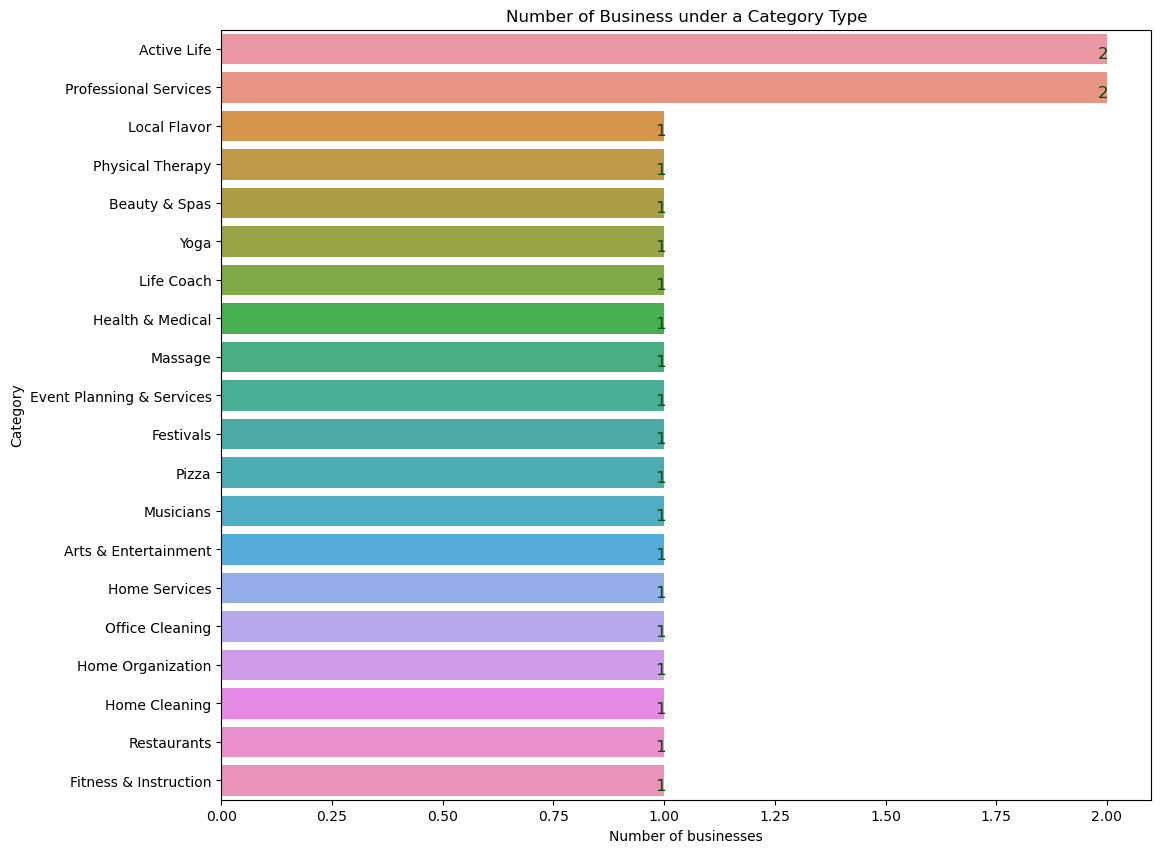

In [31]:
plt.figure(figsize=(12,10))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
ax.set_ylabel('Category')
ax.set_xlabel('Number of businesses')
ax.set_title('Number of Business under a Category Type')

for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()   

We have very less information about california in this 170000+ dataset. 

I plan to extract information from google map, with store name, hours, rating, latitude, longitude, address, etc. 

What we need to do is to create a project on google cloud so that we can have a API, and we will use that to get the information from google maps.

In [1]:
import googlemaps

In [2]:
api_key = 'YOUR_API_KEY'

In [91]:
def search(city, interest):
    """
    search the place for some specific interests
    
    city: the name of the city 
    interest: the type of interests like restaurant, museums
    
    """
    gmaps = googlemaps.Client(key = api_key)
    places_result = gmaps.places(query = city, type = interest)
    places_list = places_result['results']
    return(places_list) 
    

In [92]:
# Replace city and interest with anything you want to search
places = search("Los Angeles","restaurant")

For example here, we want to find **restaurant** in **Los Angeles**.

In [98]:
places[0]

{'business_status': 'OPERATIONAL',
 'formatted_address': '639 S Spring St, Los Angeles, CA 90014, United States',
 'geometry': {'location': {'lat': 34.045169, 'lng': -118.2521037},
  'viewport': {'northeast': {'lat': 34.04645827989272,
    'lng': -118.2506161701073},
   'southwest': {'lat': 34.04375862010728, 'lng': -118.2533158298927}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/cafe-71.png',
 'icon_background_color': '#FF9E67',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/cafe_pinlet',
 'name': 'L.A. Cafe (Open Daily 6am - 3am)',
 'opening_hours': {'open_now': True},
 'photos': [{'height': 3024,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/106117415649786714997">A Google User</a>'],
   'photo_reference': 'AfLeUgM5VbFG2OKGEtkfBHPlruG4jq07lr2TGGo9tOrK89A04UQNs_S64gcyBPH6SaOOOjLhkhdVcVZRI0ttsc3DWPsdGZ-1syPMIUDDr_mOUDCLv75yGS1kFIWxUMR5nlzC95Tfunoj2l8cOUCmfDDD0KymmQvM_TPqlKFxeKPqXtk0fQ2K',
   'width': 4

This is the first result it returned. It provids basically everything we want, expect the opening hours, it only tells us it's opening now or not.

In [99]:
places[2]

{'business_status': 'OPERATIONAL',
 'formatted_address': '8500 Beverly Blvd Suite 117, Los Angeles, CA 90048, United States',
 'geometry': {'location': {'lat': 34.0748256, 'lng': -118.3768276},
  'viewport': {'northeast': {'lat': 34.07620357989272,
    'lng': -118.3753459201073},
   'southwest': {'lat': 34.07350392010728, 'lng': -118.3780455798927}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png',
 'icon_background_color': '#FF9E67',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet',
 'name': 'Angler Los Angeles',
 'opening_hours': {'open_now': False},
 'photos': [{'height': 5271,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/111407976944719251220">A Google User</a>'],
   'photo_reference': 'AfLeUgO4wHrgzIR3ObVDPvWNN2_8WVEgD9u_Ui2u0-XHCcM8EsKhVUvZFPPtSO2MGTWilxIf29IzS9pXlhlJozYeAoAXHYjB6KS9EwSsBSv8UxFI350tBx5umxxZi8K7b2CwOM3EMegl66sSrvzAy7R76yu5iAC0aSrf20DRz_WejkavYgVR',
 

I pretty like the `price_level`. However, it's not provided everytime, we better not use it.

In [16]:
len(places)

20

The Places API returns up to 20 results per query by default. We can retrieve more than 20 results by using `next_page_token` field which returned in the response of the initial query to make subsequent queries. 

However, `next_page_token` is valid for a short time and can only be used once. 

**NOTE**: There are some restrictions on the usage of `next_page_token`. For example, you can't use it to retrieve more than 60 results per query, and you can't make more than 2,000 requests per day. More information check [here](https://developers.google.com/maps/documentation)

Here 20 results is good for us so we just keep our search function like that.

In [100]:
import pandas as pd
def info(places):
    """
    Extract useful information from the 
    list of places and return a dataframe
    
    city: the name of the city 
    interest: the type of interests like restaurant, museums
    
    """
    columns = ['name', 'address', 'latitude', 'longitude', 'rating', 'rating_numbers', 'open_now', 'types']
    df = pd.DataFrame(columns = columns)
    
    for place in places:
        name = place['name']
        address = place['formatted_address']
        latitude = place['geometry']['location']['lat']
        longitude = place['geometry']['location']['lng']
        rating = place.get('rating', 0) # Use 0 as default rating if not found
        rating_numbers = place.get('user_ratings_total', 0) # Use 0 as default rating count if not found
        open_now = place.get('opening_hours').get('open_now')
        types = place.get('types')

        df = pd.concat([df, pd.DataFrame({
            'name': [name],
            'address': [address],
            'latitude': [latitude],
            'longitude': [longitude],
            'rating': [rating],
            'rating_numbers': [rating_numbers],
            'open_now': [open_now],
            'types': [types],
        })])

    
    df.reset_index(drop = True, inplace = True)
    
    
    return df

In [101]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

df = info(places)

Meet problem with warning here, given that df.append() will be removed from pandas in a future version. Use pandas concat instead. 

Another problem is that when we set df = info(), we have:
```
/var/folders/j8/nfzq48t10lb2kj3mrj1fc5pc0000gp/T/ipykernel_27116/3524409259.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.DataFrame({
```
It doesn't effect our df so we just set it not show up.

In [102]:
df

,name,address,latitude,longitude,rating,rating_numbers,open_now,types
0,L.A. Cafe (Open Daily 6am - 3am),"639 S Spring St, Los Angeles, CA 90014, United...",34.045169,-118.252104,4.3,1981,True,"[cafe, store, restaurant, food, point_of_inter..."
1,Craft Los Angeles,"10100 Constellation Blvd, Los Angeles, CA 9006...",34.059112,-118.414801,4.6,499,False,"[restaurant, food, point_of_interest, establis..."
2,Angler Los Angeles,"8500 Beverly Blvd Suite 117, Los Angeles, CA 9...",34.074826,-118.376828,4.4,97,False,"[restaurant, food, point_of_interest, establis..."
3,Violet L.A.,"1121 Glendon Ave, Los Angeles, CA 90024, Unite...",34.060483,-118.444334,4.7,64,False,"[restaurant, food, point_of_interest, establis..."
4,Double Take,"10740 Wilshire Blvd, Los Angeles, CA 90024, Un...",34.060002,-118.437368,4.1,69,False,"[bar, night_club, restaurant, food, point_of_i..."
5,Toranj,"10861 Lindbrook Dr, Los Angeles, CA 90024, Uni...",34.060243,-118.442947,4.2,268,False,"[restaurant, food, point_of_interest, establis..."
6,République Café Bakery & République Restaurant,"624 S La Brea Ave, Los Angeles, CA 90036, Unit...",34.064086,-118.343796,4.6,4541,False,"[bakery, bar, cafe, store, restaurant, food, p..."
7,LALA'S Downtown Los Angeles,"105 W 9th St, Los Angeles, CA 90015, United St...",34.041871,-118.255055,4.4,330,False,"[restaurant, food, point_of_interest, establis..."
8,Carmine's Restaurant & Bar,"10463 Santa Monica Blvd, Los Angeles, CA 90025...",34.056341,-118.426219,4.5,141,False,"[restaurant, food, point_of_interest, establis..."
9,Bestia,"2121 E 7th Pl, Los Angeles, CA 90021, United S...",34.033649,-118.229243,4.6,3012,False,"[restaurant, food, point_of_interest, establis..."


We have type as a list. To access a specific element from a list, we can use indexing.

For example, we have:
```
'types': ['bar',
   'night_club',
   'restaurant',
   'food',
   'point_of_interest',
   'establishment']
```
- To access the first element of the 'types' list. `types[0]` will return 'bar'. `types[1]` will return 'night_club'.

- To extract a range of elements from the list, we can use slicing. `types[:3]` will return ['bar', 'night_club', 'restaurant'].

- To check if a specific element exists in the list, we can use the `in` operator. To check if 'restaurant' is in the 'types' list, use `'restaurant' in types` will return True.

We can work on this later when the user want to select specific type of place.

Now we have the function that can return the place information, we'd like to build a web application that user can access through their web browser so we can display information and interact with the users. We would do this by using Flask. 


In [134]:
import sqlite3

def save_to_database(df):
"""
A function save dataframe to database

"""
    # Connect to the database
    conn = sqlite3.connect('places.db')
    cur = conn.cursor()

    # Drop the places table if it already exists
    cur.execute("DROP TABLE IF EXISTS places")

    # Create a new places table
    cur.execute("CREATE TABLE places (name TEXT, address TEXT, latitude REAL, longitude REAL, rating INTEGER, rating_numbers INTEGER, open_now TEXT, types TEXT)")

    # Insert the data into the places table
    for row in df.itertuples(index = False):

        cur.execute("INSERT INTO places VALUES (?, ?, ?, ?, ?, ?, ?, ?)",
                    (str(row.name), str(row.address), float(row.latitude), float(row.longitude), float(row.rating), int(row.rating_numbers), str(row.open_now), str(row.types)))
        
    # Commit the changes and close the connection
    conn.commit()
    conn.close()
    


In [135]:
save_to_database(df)

Now we are just testing if everything is working ok so we have so many variables like places and df. We would combine it together when we finish everything at the end so we don't need to save them seperately.

In [136]:
conn = sqlite3.connect('places.db')
cur = conn.cursor()

cur.execute("SELECT * FROM places")
rows = cur.fetchone() # use one as example

for row in rows:
    print(row)

conn.close()


L.A. Cafe (Open Daily 6am - 3am)
639 S Spring St, Los Angeles, CA 90014, United States
34.045169
-118.2521037
4.3
1981
True
['cafe', 'store', 'restaurant', 'food', 'point_of_interest', 'establishment']


This is how the database looks like. Now we move to flask part.

In [141]:
# Save for later (calculate distance)

# pip install geopy 
import geopy.distance
p_1 = (df['latitude'][0], df['longitude'][0])
p_2 = (df['latitude'][1], df['longitude'][1])

d=geopy.distance.geodesic(p_1, p_2).km

print(d)

15.100949144477791


In [140]:
pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
